In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read a CSV file located at the specified path and load it into a DataFrame 'df'
df = pd.read_csv("C:\\Downloads\\just-degree-left.csv")

In [3]:
df

,Unnamed: 0,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,0,Cardiologist,"MBBS, MD, DM",19.0,Hebbal,Bangalore,1,46,1000
1,1,Cardiologist,"MBBS, MD, DM",21.0,Old Airport Road,Bangalore,91,89,1100
2,2,Cardiologist,"MBBS, MD, DM",20.0,Hebbal,Bangalore,67,12,1000
3,6,Cardiologist,"MBBS, MD, DM",35.0,Seshadripuram,Bangalore,91,23,950
4,7,Cardiologist,"MBBS, MD, DM",7.0,Whitefield,Bangalore,91,23,900
...,...,...,...,...,...,...,...,...,...
4730,5751,Bariatric,"MBBS, MS",31.0,Powai,Mumbai,95,111,1500
4731,5752,Bariatric,"MS, MBBS",17.0,Chembur,Mumbai,94,106,1500
4732,5753,Bariatric,"MBBS, MS",37.0,Chembur,Mumbai,96,26,1500
4733,5754,Bariatric,"MBBS, MS",27.0,Mulund West,Mumbai,89,18,1000


# Checking for null values

In [4]:
df.isnull().sum()

Unnamed: 0             0
Speciality             0
Degree                69
Year_of_experience     0
Location               0
City                   0
dp_score               0
npv                    0
consultation_fee       0
dtype: int64

# droping null values 

In [5]:
df.dropna(axis = 0, inplace = True)

In [6]:
df.isnull().sum()

Unnamed: 0            0
Speciality            0
Degree                0
Year_of_experience    0
Location              0
City                  0
dp_score              0
npv                   0
consultation_fee      0
dtype: int64

# droping irrelavent column

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df.head()

,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,Cardiologist,"MBBS, MD, DM",19.0,Hebbal,Bangalore,1,46,1000
1,Cardiologist,"MBBS, MD, DM",21.0,Old Airport Road,Bangalore,91,89,1100
2,Cardiologist,"MBBS, MD, DM",20.0,Hebbal,Bangalore,67,12,1000
3,Cardiologist,"MBBS, MD, DM",35.0,Seshadripuram,Bangalore,91,23,950
4,Cardiologist,"MBBS, MD, DM",7.0,Whitefield,Bangalore,91,23,900


In [9]:
df.dtypes

Speciality             object
Degree                 object
Year_of_experience    float64
Location               object
City                   object
dp_score                int64
npv                     int64
consultation_fee        int64
dtype: object

# EDA

In [10]:
# Summary statistics
df.describe()

,Year_of_experience,dp_score,npv,consultation_fee
count,4666.000000,4666.000000,4666.000000,4666.000000
mean,18.262752,64.967424,84.665024,762.754179
std,8.498255,41.745195,87.513480,340.135688
min,1.000000,1.000000,11.000000,0.000000
25%,12.000000,1.000000,21.000000,500.000000
50%,17.000000,91.000000,46.000000,700.000000
75%,23.000000,97.000000,116.000000,1000.000000
max,43.000000,99.000000,394.000000,1750.000000


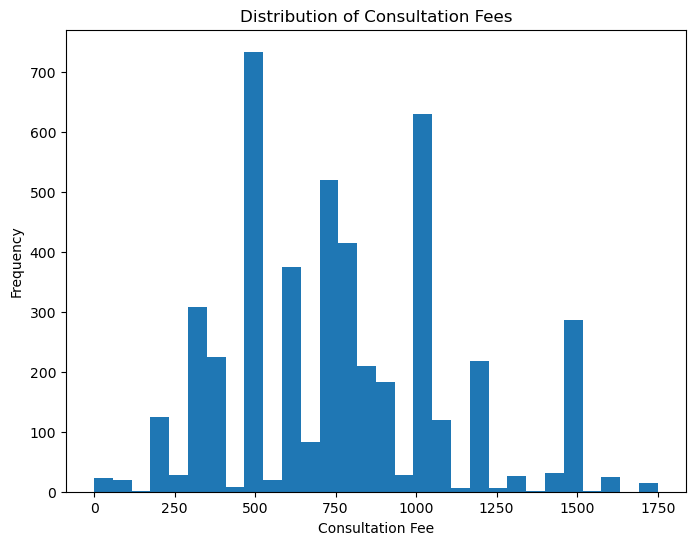

In [11]:
# Histogram of consultation fees
plt.figure(figsize=(8, 6))
plt.hist(df['consultation_fee'], bins=30)
plt.xlabel('Consultation Fee')
plt.ylabel('Frequency')
plt.title('Distribution of Consultation Fees')
plt.show()

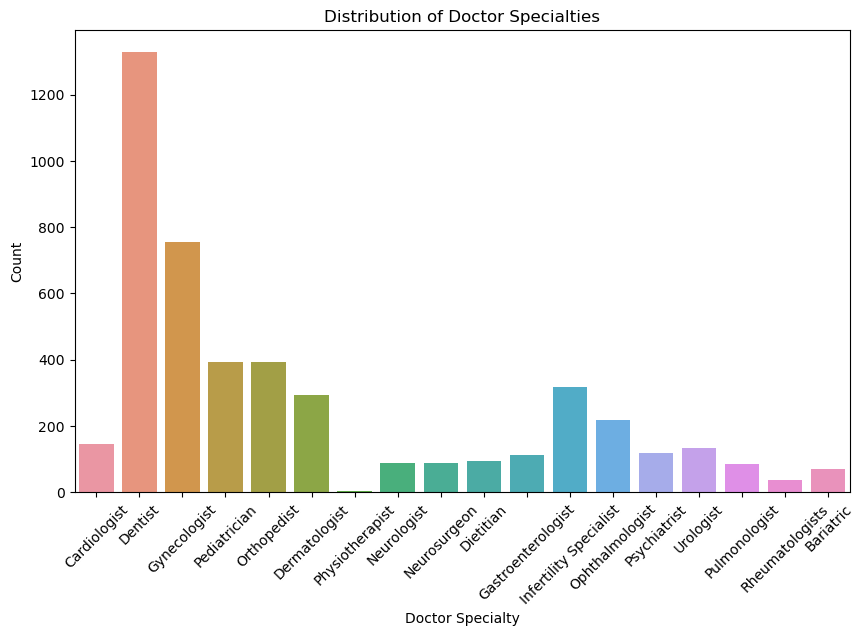

In [12]:
# Bar plot of doctor specialties
plt.figure(figsize=(10, 6))
sns.countplot(x='Speciality', data=df)
plt.xlabel('Doctor Specialty')
plt.ylabel('Count')
plt.title('Distribution of Doctor Specialties')
plt.xticks(rotation=45)
plt.show()

In [13]:
df.head()

,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,Cardiologist,"MBBS, MD, DM",19.0,Hebbal,Bangalore,1,46,1000
1,Cardiologist,"MBBS, MD, DM",21.0,Old Airport Road,Bangalore,91,89,1100
2,Cardiologist,"MBBS, MD, DM",20.0,Hebbal,Bangalore,67,12,1000
3,Cardiologist,"MBBS, MD, DM",35.0,Seshadripuram,Bangalore,91,23,950
4,Cardiologist,"MBBS, MD, DM",7.0,Whitefield,Bangalore,91,23,900


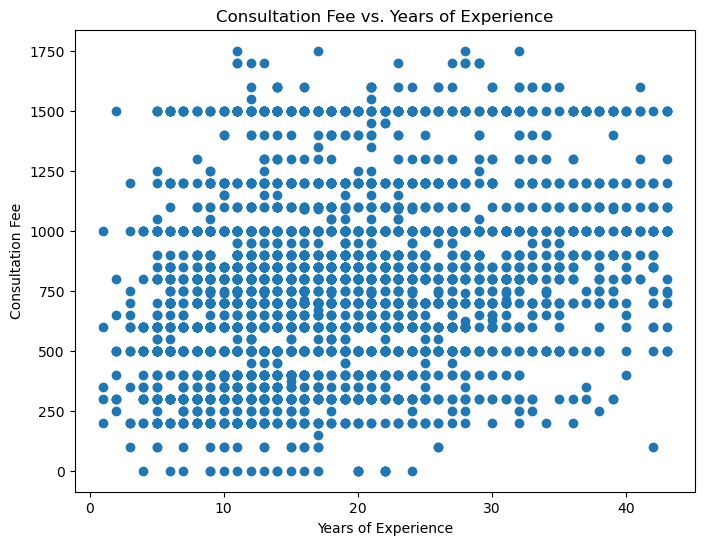

In [14]:
# Scatter plot of consultation fee vs. years of experience
plt.figure(figsize=(8, 6))
plt.scatter(df['Year_of_experience'], df['consultation_fee'])
plt.xlabel('Years of Experience')
plt.ylabel('Consultation Fee')
plt.title('Consultation Fee vs. Years of Experience')
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_16036\2006941134.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


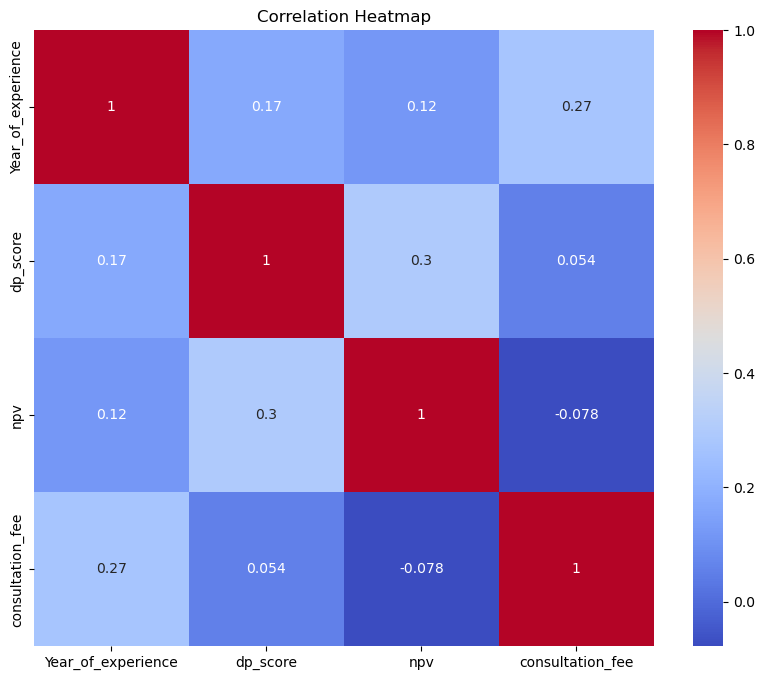

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# count of doctors in each city according to their specialization

In [16]:
d1 = df.groupby(by=['City','Speciality'])['Degree'].count().reset_index()
d1

,City,Speciality,Degree
0,Bangalore,Bariatric,33
1,Bangalore,Cardiologist,89
2,Bangalore,Dentist,615
3,Bangalore,Dermatologist,142
4,Bangalore,Dietitian,29
5,Bangalore,Gastroenterologist,64
6,Bangalore,Gynecologist,377
7,Bangalore,Infertility Specialist,154
8,Bangalore,Neurologist,53
9,Bangalore,Neurosurgeon,53


# fee analysis according to different speciality for each city

In [17]:
a = {'consultation_fee':['min','max','median']}

In [18]:
b = df.groupby(by=['Speciality']).agg(a).reset_index()
b

Speciality consultation_fee              
                                        min   max  median
0                Bariatric              400  1500   875.0
1             Cardiologist              550  1550  1000.0
2                  Dentist                0  1500   500.0
3            Dermatologist              300  1700   800.0
4                Dietitian                0  1500   800.0
5       Gastroenterologist              350  1700  1000.0
6             Gynecologist                0  1750   800.0
7   Infertility Specialist                0  1600   800.0
8              Neurologist              500  1700  1000.0
9             Neurosurgeon              500  1700  1000.0
10         Ophthalmologist              200  1500   700.0
11             Orthopedist              200  1750   800.0
12            Pediatrician              300  1750   850.0
13         Physiotherapist              600   700   650.0
14            Psychiatrist              700  1700  1200.0
15           Pulmonologist              500  1700   850.0
16         Rheumatologists              400  1500  1000.0
17               Urologist              450  1700   850.0

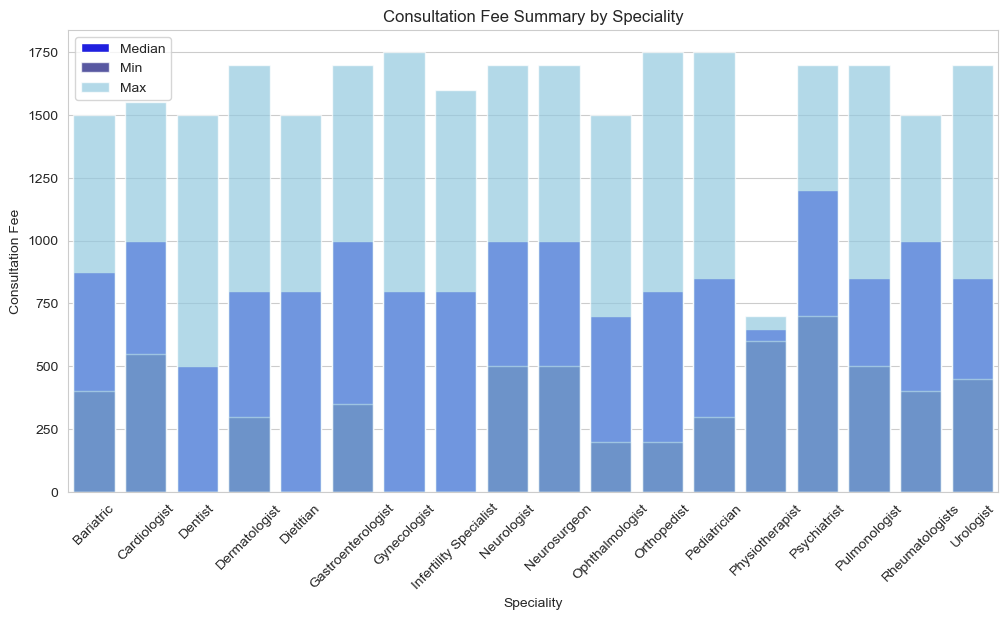

In [23]:
# Setting up the plot style
sns.set_style('whitegrid')

# Creating the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=b, x='Speciality', y=('consultation_fee', 'median'), color='blue', label='Median')
sns.barplot(data=b, x='Speciality', y=('consultation_fee', 'min'), color='darkblue', label='Min', alpha = 0.7)
sns.barplot(data=b, x='Speciality', y=('consultation_fee', 'max'), color='skyblue', label='Max', alpha = 0.7)

# Adding labels and titles
plt.xlabel('Speciality')
plt.ylabel('Consultation Fee')
plt.title('Consultation Fee Summary by Speciality')
plt.legend()

# Rotating x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Top 5 most common degree

In [20]:
degree_counts = df['Degree'].value_counts().head(5)
degree_counts

MBBS, MD     575
BDS          575
MBBS, MS     541
BDS, MDS     533
MBBS, DNB    264
Name: Degree, dtype: int64

In [21]:
colors = ['steelblue', 'orange', 'green', 'purple', 'red']


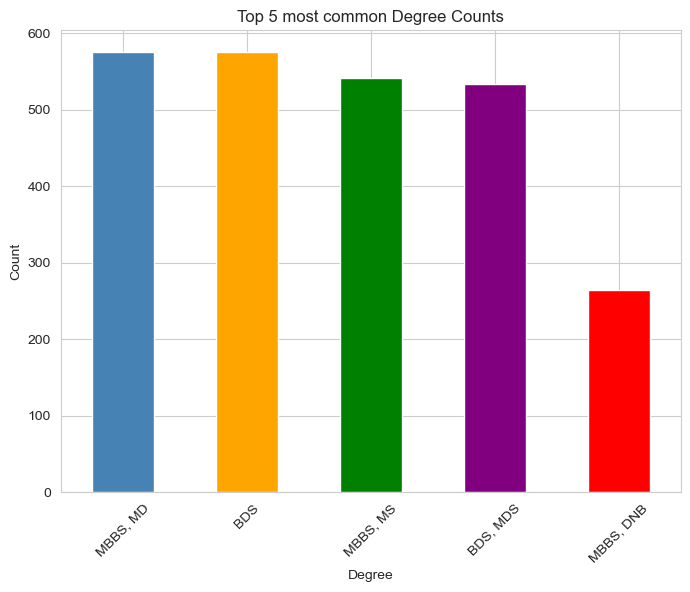

In [22]:
# Plotting the bar graph
plt.figure(figsize=(8, 6))
degree_counts.plot(kind='bar', color=colors)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Top 5 most common Degree Counts')
plt.xticks(rotation=45)
plt.show()

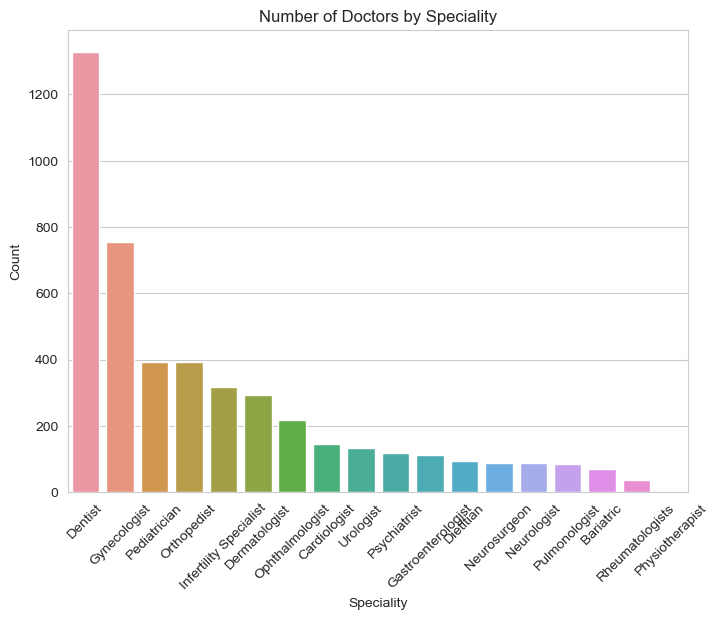

In [26]:
# Number of Doctors by Speciality
doctors_by_speciality = df['Speciality'].value_counts()

# Plotting Number of Doctors by Speciality
plt.figure(figsize=(8, 6))
sns.barplot(x=doctors_by_speciality.index, y=doctors_by_speciality.values)
plt.title("Number of Doctors by Speciality")
plt.xlabel("Speciality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [28]:
df.head()

,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,Cardiologist,"MBBS, MD, DM",19.0,Hebbal,Bangalore,1,46,1000
1,Cardiologist,"MBBS, MD, DM",21.0,Old Airport Road,Bangalore,91,89,1100
2,Cardiologist,"MBBS, MD, DM",20.0,Hebbal,Bangalore,67,12,1000
3,Cardiologist,"MBBS, MD, DM",35.0,Seshadripuram,Bangalore,91,23,950
4,Cardiologist,"MBBS, MD, DM",7.0,Whitefield,Bangalore,91,23,900


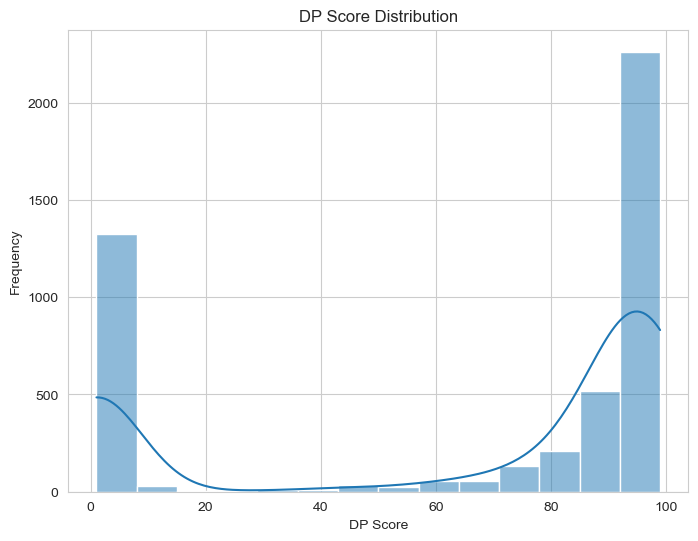

In [31]:
# # Average Years of Experience
# avg_years_of_experience = df['Year_of_experience'].mean()
# print("\nAverage Years of Experience:", avg_years_of_experience)

# Patient Experience Score (DP Score) Analysis
dp_score_stats = df['dp_score'].describe()

# Plotting DP Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['dp_score'], kde=True)
plt.title("DP Score Distribution")
plt.xlabel("DP Score")
plt.ylabel("Frequency")
plt.show()

In [30]:
# Average Years of Experience
avg_years_of_experience = df['Year_of_experience'].mean()
print("\nAverage Years of Experience:", avg_years_of_experience)


Average Years of Experience: 18.262751821688813


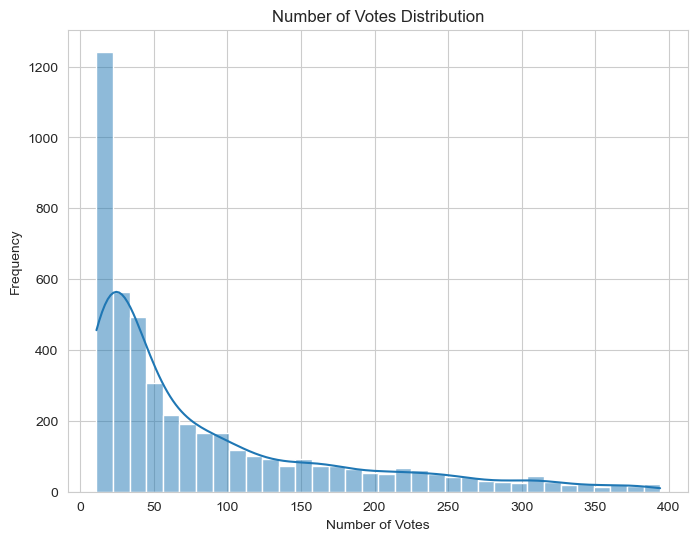

In [33]:
# Number of Votes Analysis
num_votes_stats = df['npv'].describe()

# Plotting Number of Votes Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['npv'], kde=True)
plt.title("Number of Votes Distribution")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.show()

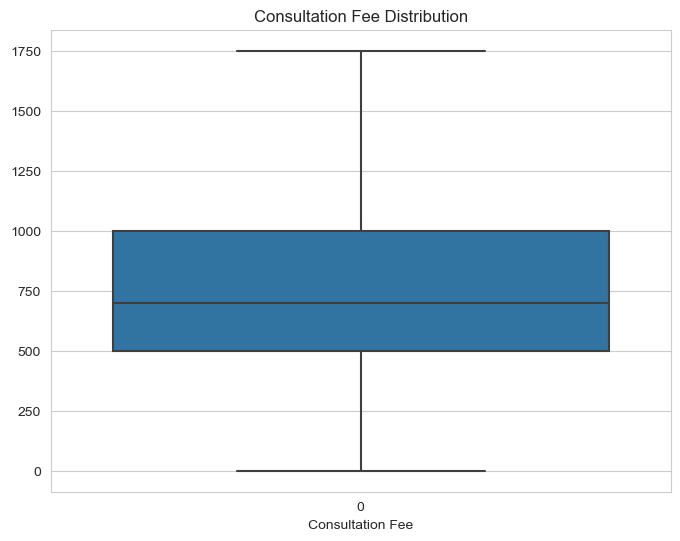

In [36]:
# Consultation Fee Analysis
consultation_fee_stats = df['consultation_fee'].describe()

# Plotting Consultation Fee Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(df['consultation_fee'])
plt.title("Consultation Fee Distribution")
plt.xlabel("Consultation Fee")
plt.show()

In [42]:
# Location Analysis
city_counts = df['City'].value_counts()

city_counts

Bangalore    2307
Delhi        1373
Mumbai        986
Name: City, dtype: int64

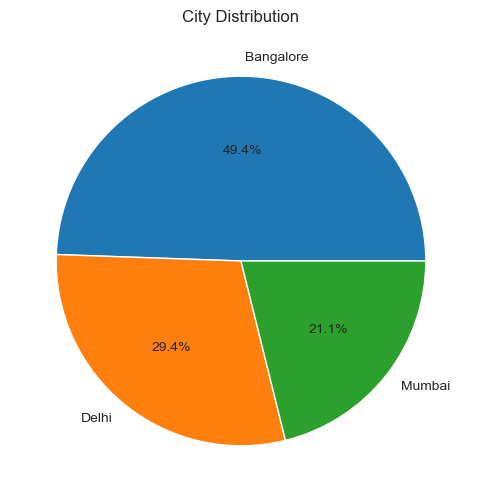

In [44]:
plt.figure(figsize=(8, 6))
plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%')
plt.title("City Distribution")
plt.show()